# Sparse imaging with LASSO

This example generates a sparse signal and tries to recover it using lasso

In [2]:
from __future__ import print_function
from __future__ import division
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np
from scipy import misc
from IPython import display
from simulator import *
%matplotlib inline

We generate an orthogonal matrix A and compute measurements = Aw+z where w is the vectorized format of the sparse image

Text(0.5,1,'Original Sparse Image')

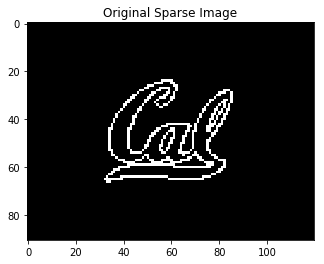

In [3]:
measurements,A,I = simulate() 

# THE SETTINGS FOR THE IMAGE - PLEASE DO NOT CHANGE
height = 91
width = 120
sparsity = 476
numPixels = len(A[0])

plt.imshow(I, cmap=plt.cm.gray, interpolation='nearest');
plt.title('Original Sparse Image')

We plot matrix A:

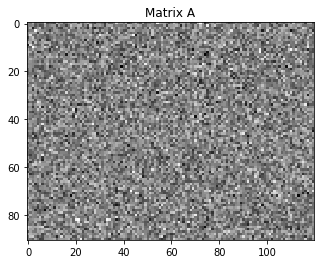

In [4]:
chosenMaskToDisplay = 0
M0 = A[chosenMaskToDisplay].reshape((height,width))
plt.title('Matrix A')
plt.imshow(M0, cmap=plt.cm.gray, interpolation='nearest');

And here is the plot of measurement vector:

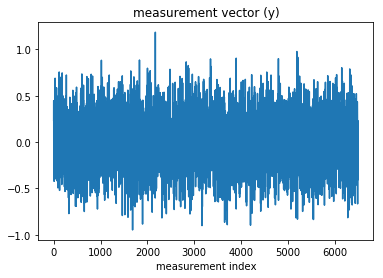

In [5]:
# measurements
plt.title('measurement vector (y)')
plt.plot(measurements)
plt.xlabel('measurement index')
plt.show()

We use lasso to recover the image:

In [6]:
def LASSO(imDims, measurements, A, a):
    clf = linear_model.Lasso(alpha=a)
    clf.fit(A,measurements)
    Ihat = clf.coef_.reshape(imDims)
    plt.title('estimated image')
    plt.imshow(Ihat, cmap=plt.cm.gray, interpolation='nearest') 
    return clf.coef_

Change the lasso regularization parameter to recover the image and report the value.

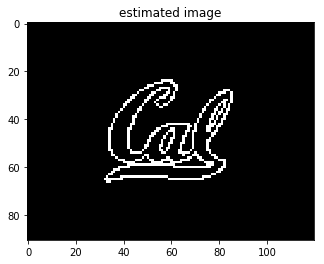

In [28]:
# change the lasso parameter here:
a = 0.0000001
recovered = LASSO((height,width),measurements,A,a)